In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression,ridge_regression,Ridge,Lasso,LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_squared_log_error
import xgboost as xgb


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/data_cleaned_v3.csv')

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253047 entries, 0 to 2253046
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pickup_datetime         object 
 1   Trip Seconds            float64
 2   Company                 int64  
 3   Pickup Community Area   float64
 4   Dropoff Community Area  float64
 5   pickup_latitude         float64
 6   pickup_longitude        float64
 7   dropoff_latitude        float64
 8   dropoff_longitude       float64
 9   month                   int64  
 10  hour                    int64  
 11  day_of_week             int64  
 12  day                     int64  
 13  distance                float64
 14  tempearture             float64
 15  precipitation           float64
 16  humidity                float64
 17  wind_speed              float64
 18  is_rush_hour            int64  
 19  is_work_day             int64  
dtypes: float64(12), int64(7), object(1)
memory usage: 343.8+ MB


In [ ]:
df.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','pickup_datetime'],axis = 1, inplace = True)

In [ ]:
X = df.drop(['Trip Seconds'],axis = 1)
y = df['Trip Seconds']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253047 entries, 0 to 2253046
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Trip Seconds            float64
 1   Company                 int64  
 2   Pickup Community Area   float64
 3   Dropoff Community Area  float64
 4   month                   int64  
 5   hour                    int64  
 6   day_of_week             int64  
 7   day                     int64  
 8   distance                float64
 9   tempearture             float64
 10  precipitation           float64
 11  humidity                float64
 12  wind_speed              float64
 13  is_rush_hour            int64  
 14  is_work_day             int64  
dtypes: float64(8), int64(7)
memory usage: 257.8 MB


In [ ]:
continous_features = ['distance','tempearture','humidity','wind_speed','precipitation']

In [ ]:
columns_to_barplot = ['is_rush_hour','is_work_day']

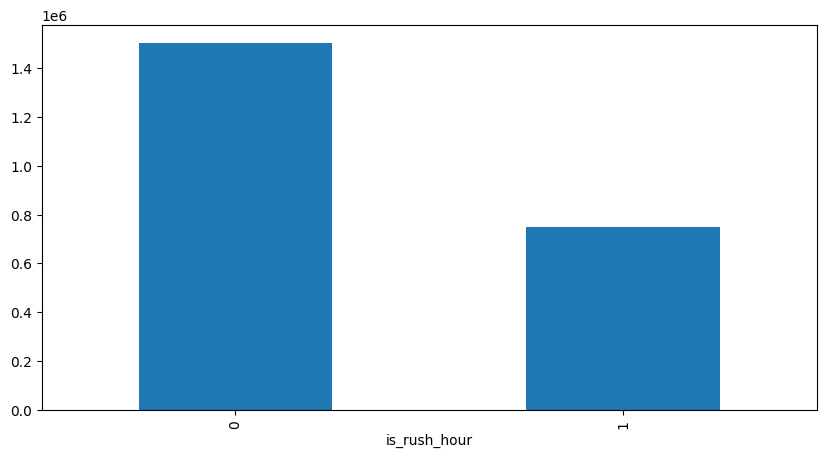

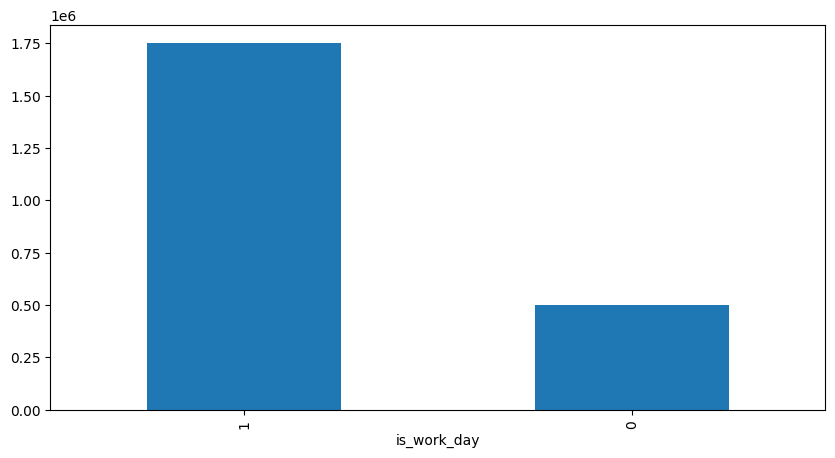

In [ ]:
for column in columns_to_barplot:
    plt.figure(figsize=(10,5))
    data[column].value_counts(dropna = False).plot(kind='bar')
    plt.show()

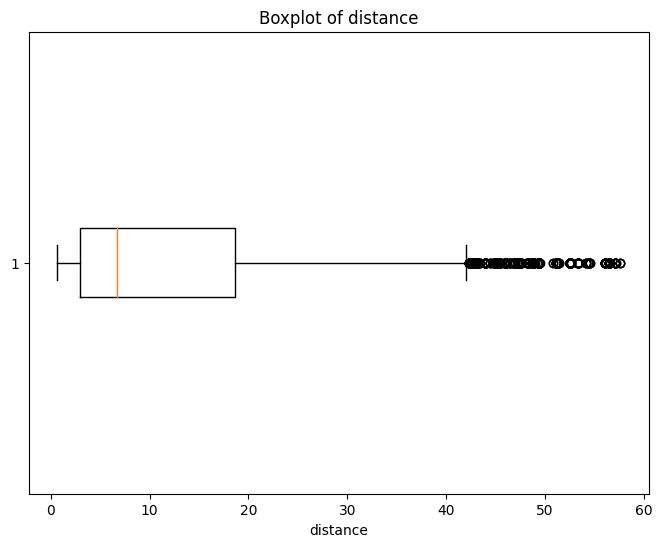

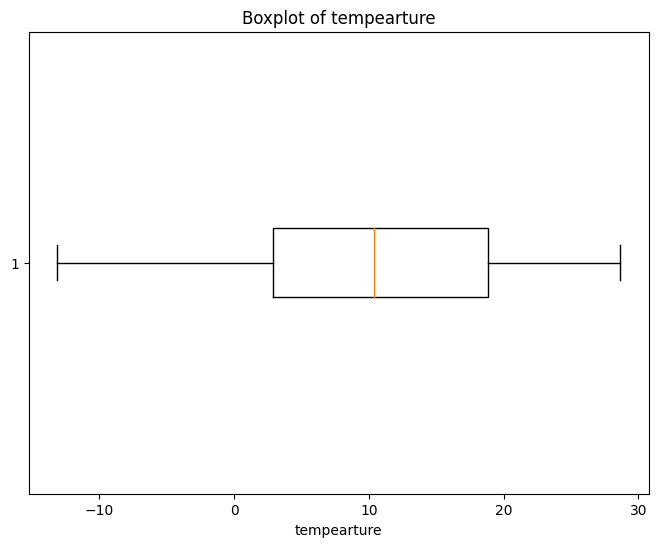

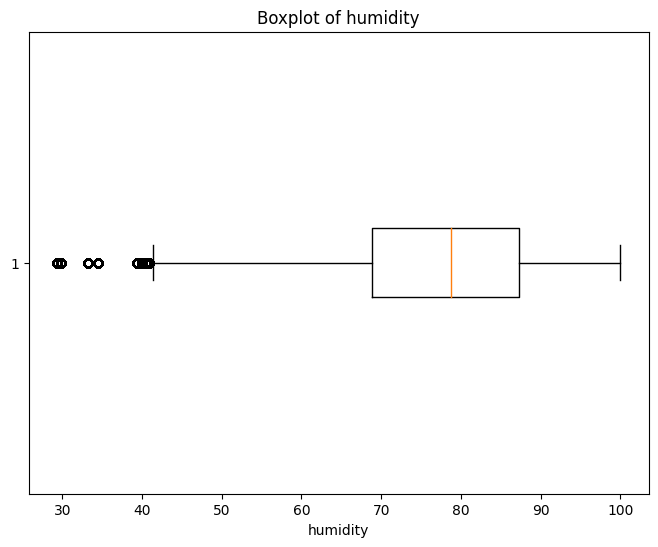

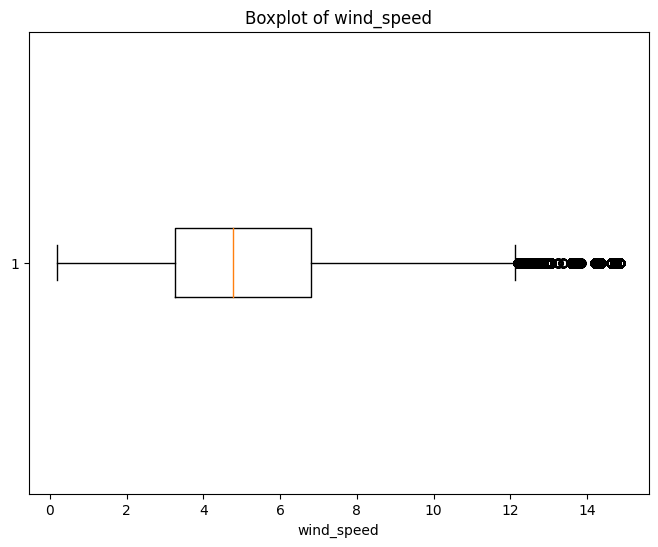

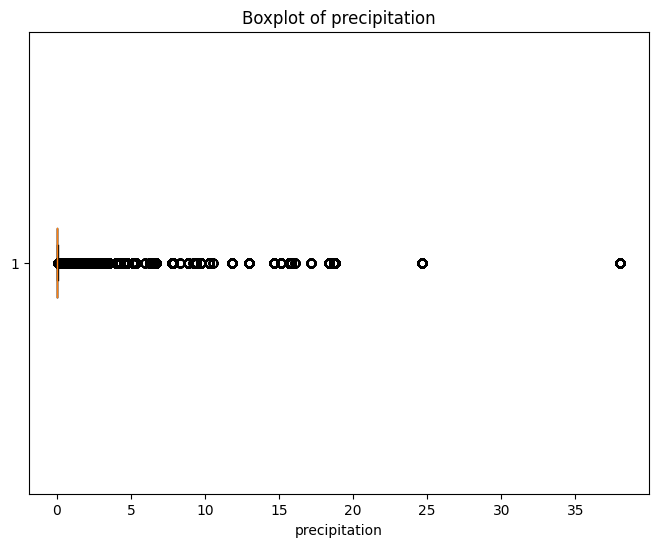

In [ ]:
def plot_continous(X,continous_features):
  for  feature in continous_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(X[feature], vert=False)  # Create a horizontal boxplot
    plt.xlabel(f'{feature}')
    plt.title(f'Boxplot of {feature}')
    plt.show()
plot_continous(df,continous_features)

In [ ]:
X['distance'] = np.log1p(X['distance'] + 1)
X['humidity'] = np.log1p(X['humidity'] + 1)
X['wind_speed'] = np.log1p(X['wind_speed'] + 1)
X['precipitation'] = np.log1p(X['precipitation'] + 1)

In [ ]:
y_log1p = np.log1p(y)

In [ ]:
scl = StandardScaler()
X_scaled = scl.fit_transform(X)

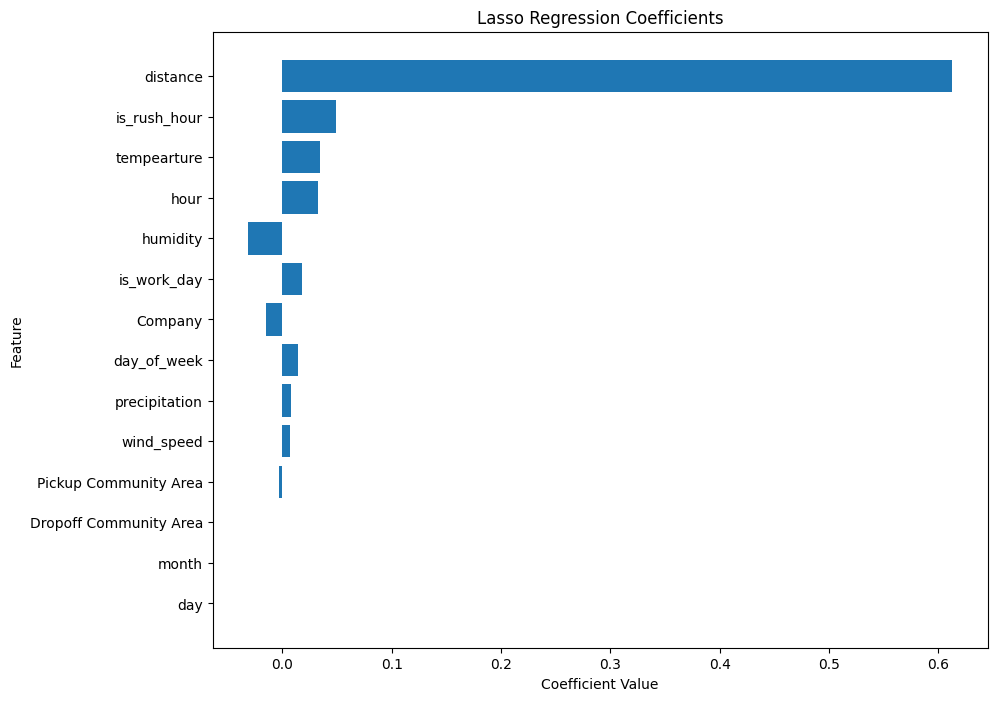

In [ ]:
lasso = LassoCV(cv=10, random_state=42)
lasso.fit(X_scaled, y_log1p)

# Get the coefficients
lasso_coef = lasso.coef_

# Prepare Data for Plotting
feature_names = X.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coef
})

# Sort by the absolute value of coefficients
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Plot the Coefficients
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficient on top
plt.show()

In [ ]:
coef_df

,Feature,Coefficient
7,distance,0.612857
12,is_rush_hour,0.049386
8,tempearture,0.034616
4,hour,0.032442
10,humidity,-0.031568
13,is_work_day,0.017541
0,Company,-0.014589
5,day_of_week,0.014128
9,precipitation,0.007593
11,wind_speed,0.006545
